In [1]:
# Importing the required libraries
import numpy as np 
from numpy import percentile
import pandas as pd 
from sklearn import preprocessing,model_selection,metrics
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


### Loading the dataset

In [2]:
train_df = pd.read_csv("/kaggle/input/tabular-playground-series-may-2022/train.csv")
test_df = pd.read_csv("/kaggle/input/tabular-playground-series-may-2022/test.csv")

### Understanding the training data 

In [3]:
train_df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

In [5]:
train_df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765473,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


<AxesSubplot:xlabel='target', ylabel='count'>

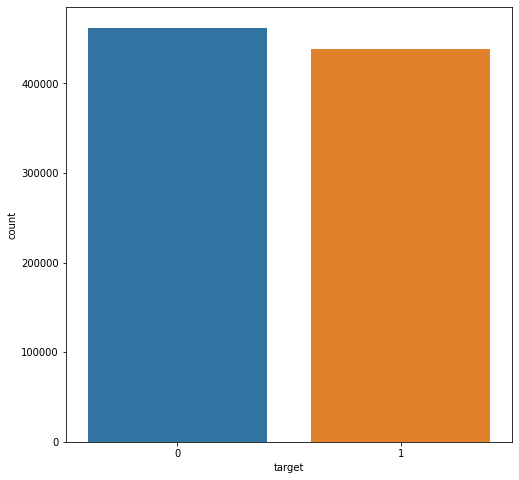

In [6]:
plt.figure(figsize=(8,8))
sns.countplot(x=train_df.target)

### The dataset is balanced. Checking if there are any missing values.

In [7]:
train_df.isnull().sum()

id        0
f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64

### There are no missing values in the dataset.

#### Plotting a histogram for each numerical column

In [8]:
numerical_columns = [col for col in train_df.columns if train_df[col].dtypes!='object' and col not in ('id','target')]
cat_column = [col for col in train_df.columns if train_df[col].dtypes=='object']

In [9]:
len(numerical_columns),len(cat_column)

(30, 1)

array([[<AxesSubplot:title={'center':'f_00'}>,
        <AxesSubplot:title={'center':'f_01'}>,
        <AxesSubplot:title={'center':'f_02'}>,
        <AxesSubplot:title={'center':'f_03'}>,
        <AxesSubplot:title={'center':'f_04'}>],
       [<AxesSubplot:title={'center':'f_05'}>,
        <AxesSubplot:title={'center':'f_06'}>,
        <AxesSubplot:title={'center':'f_07'}>,
        <AxesSubplot:title={'center':'f_08'}>,
        <AxesSubplot:title={'center':'f_09'}>],
       [<AxesSubplot:title={'center':'f_10'}>,
        <AxesSubplot:title={'center':'f_11'}>,
        <AxesSubplot:title={'center':'f_12'}>,
        <AxesSubplot:title={'center':'f_13'}>,
        <AxesSubplot:title={'center':'f_14'}>],
       [<AxesSubplot:title={'center':'f_15'}>,
        <AxesSubplot:title={'center':'f_16'}>,
        <AxesSubplot:title={'center':'f_17'}>,
        <AxesSubplot:title={'center':'f_18'}>,
        <AxesSubplot:title={'center':'f_19'}>],
       [<AxesSubplot:title={'center':'f_20'}>,
        <

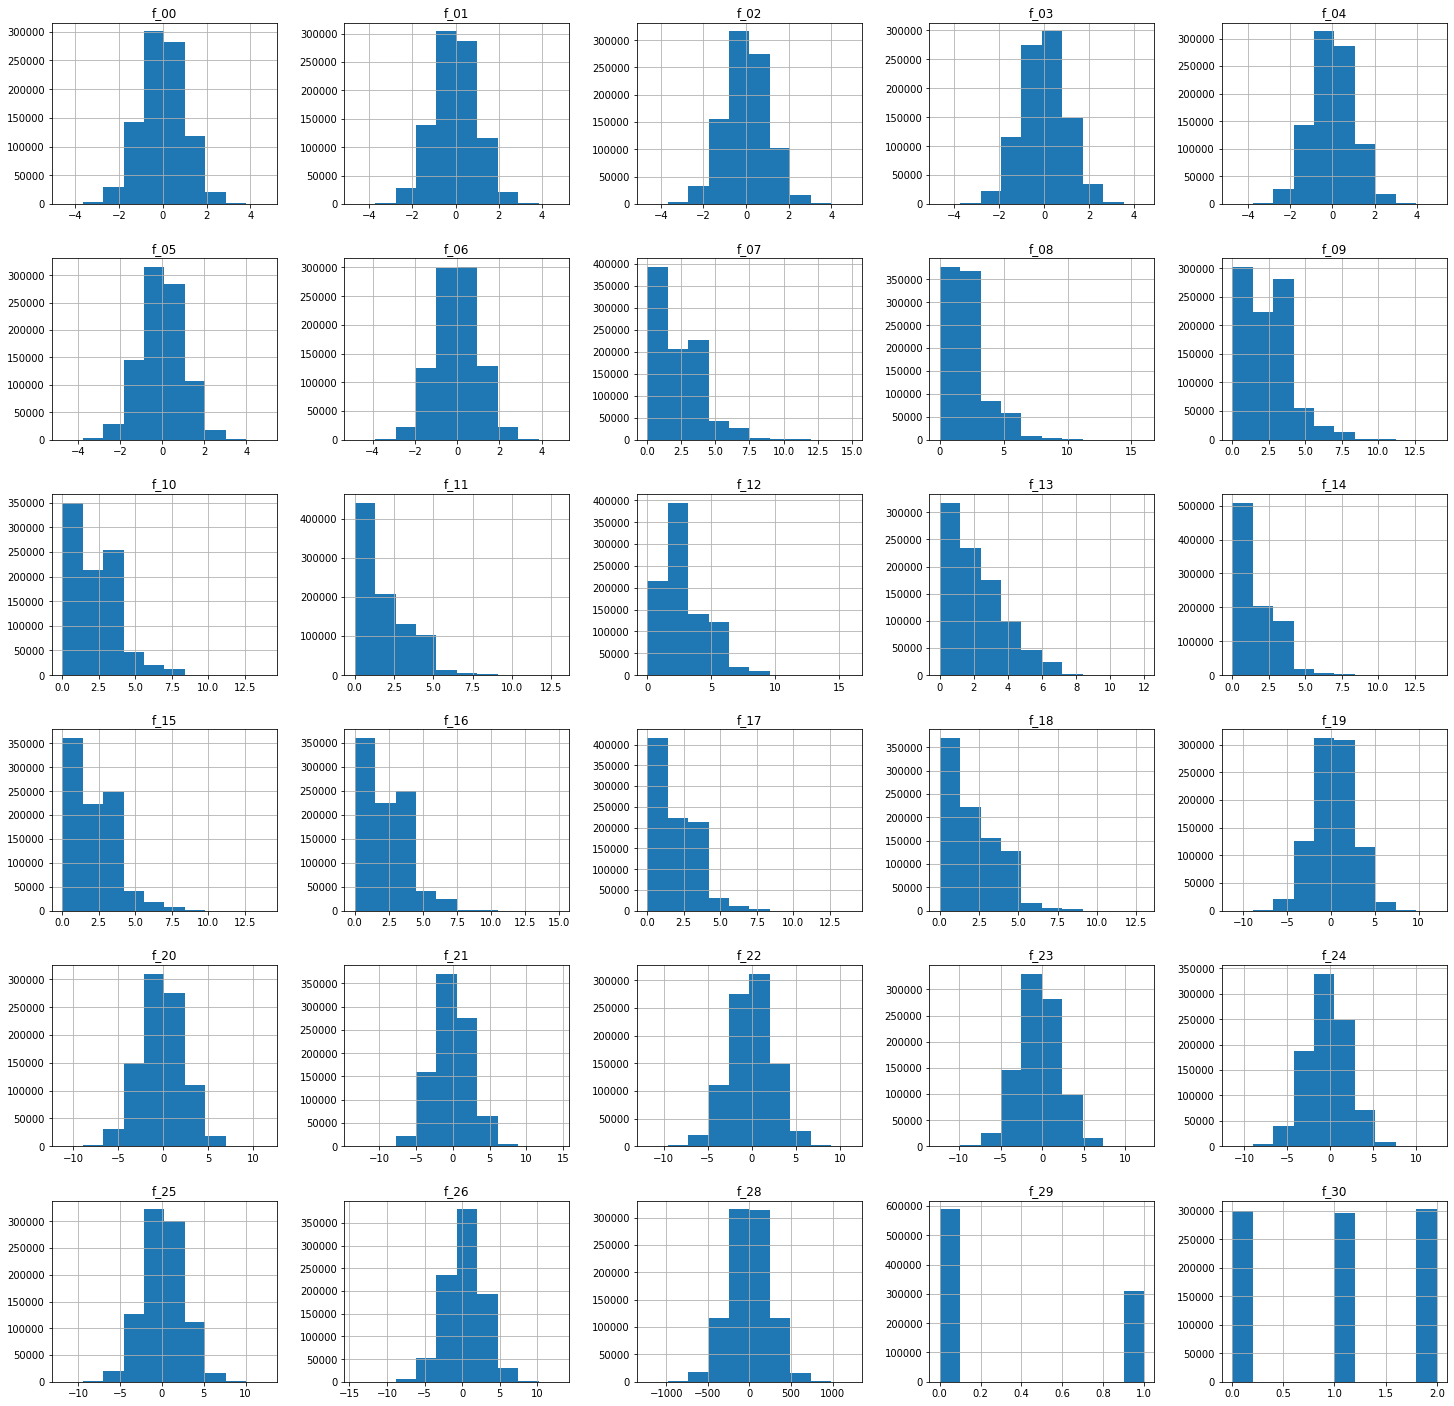

In [10]:
train_df[numerical_columns].hist(figsize=(25,25))

## Here are the some observations from the above plot:<br> 
*     ### It can be noticed that the numerical features are not uniformly scaled.
     * #### <b>For instance, "f_28" ranges between -1000 to 1000 whereas many other features lie either between -4 to 4 or -10 to 10.</b>
     * #### <b>Also, features "f_07" to "f_18" are left skewed while other features appear to be normally distributed.</b>
*    ### Most importantly, since the base algorithm will be XGBoost, it is not required to perform scaling.

### Before proceeding further, it is also important to check the outliers and handle them.

<AxesSubplot:xlabel='variable', ylabel='value'>

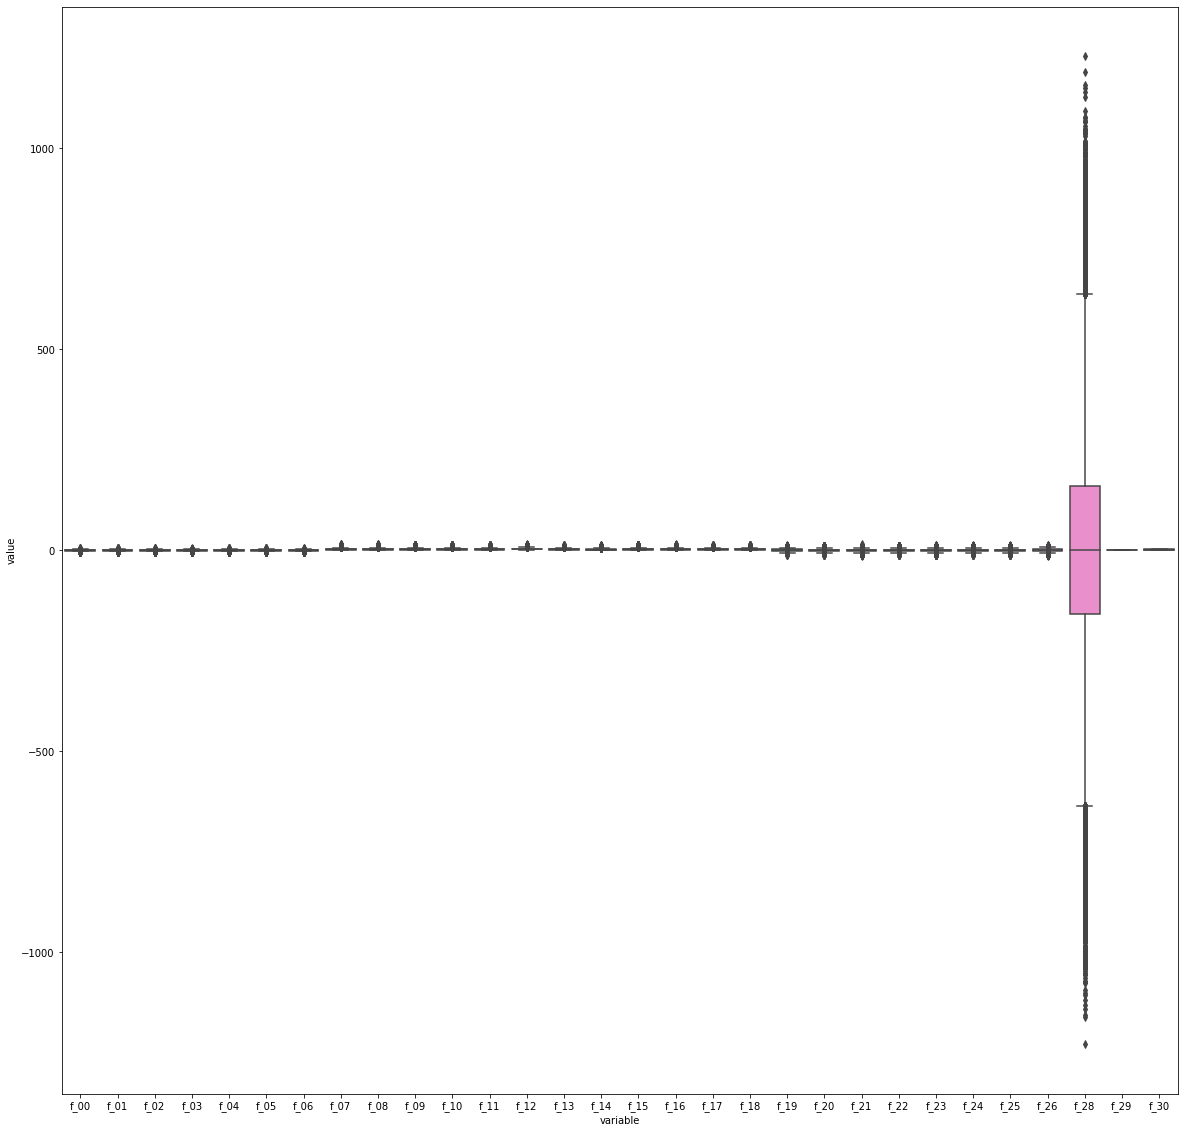

In [11]:
plt.figure(figsize=(20,20))
sns.boxplot(x='variable',y='value',data=train_df[numerical_columns].melt())

### From the boxplot it is evident that "f_28" contains outliers. The following steps need to be taken:<br>
#### 1. Identify the Q1,Q3 and calculate the Interquartile Range(IQR=Q3-Q1) 
#### 2. Remove those records that lie in the region: Q1-1.5IQR and Q3+1.5IQR

In [12]:
train_df["f_28"].describe()

count    900000.000000
mean         -0.380876
std         238.773054
min       -1229.753052
25%        -159.427418
50%          -0.519808
75%         158.987357
max        1229.562577
Name: f_28, dtype: float64

In [13]:
def plot_feature(df,feature,original_feature):
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    sns.boxplot(x=original_feature).set_title(f"{feature} before removing outliers")
    plt.subplot(1,2,2)
    sns.boxplot(x=df[feature]).set_title(f"{feature} after removing outliers")

In [14]:
def remove_outliers(df,feature):
    col = df[feature].copy()
    quartile_data = percentile(df[feature],[25,50,75])
    print(f'Processing feature:{feature}')
    Q1, Q3 = quartile_data[0],quartile_data[2]
    print(Q1,Q3)
    IQR = Q3-Q1
    #f_28_original = np.array(df[feature])
    original_length = len(df[feature])
    print(f"Original size of feature:{len(df[feature])}")
    df = df[(df[feature]>Q1-1.5*IQR) & (df[feature]<Q3+1.5*IQR)]
    print(f"Size of feature after removing outliers:{len(df[feature])}")
    print(f"Percentage of data removed: {(original_length-len(df[feature]))*100/original_length}\n")
    plot_feature(df,feature,col)
    return df

Processing feature:f_28
-159.4274175980899 158.98735667525142
Original size of feature:900000
Size of feature after removing outliers:892183
Percentage of data removed: 0.8685555555555555



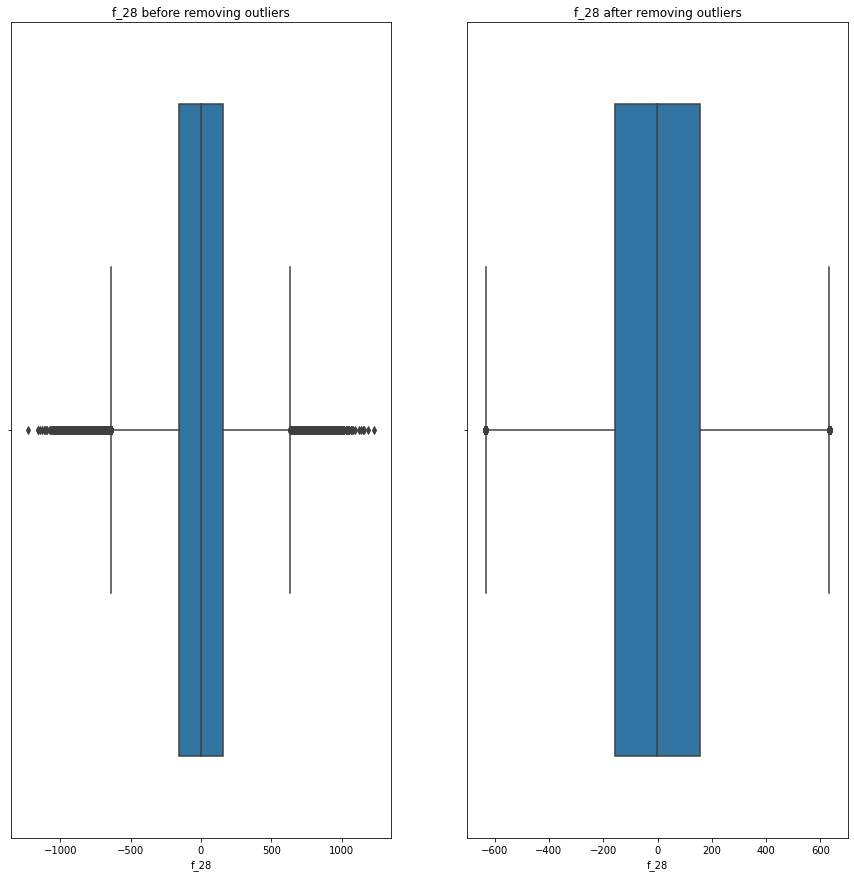

In [15]:
train_df = remove_outliers(train_df,"f_28")

f_28_original = np.array(train_df["f_28"])
print(f"Length of original array:{len(f_28_original)}")
f_28 = f_28_original[f_28_original>Q1-1.5*IQR]
print(f"Length of array after removing data less than 5 percentile:{len(f_28)}")
f_28 = f_28[f_28<Q3+1.5*IQR]
print(f"Length of array after removing data more than 95 percentile:{len(f_28)}")
print(f"Percentage of data removed: {(len(f_28_original)-len(f_28))*100/len(f_28_original)}")

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
sns.boxplot(x=train_df['f_28']).set_title("f_28 before removing outliers")
plt.subplot(1,2,2)
sns.boxplot(x=f_28).set_title("f_28 after removing outliers")


#### Since the range of f_28 was too high, it was not possible to visualize the other numerical features accurately. Checking for outliers in the other columns.

In [16]:
numerical_columns.remove("f_28")
numerical_columns

['f_00',
 'f_01',
 'f_02',
 'f_03',
 'f_04',
 'f_05',
 'f_06',
 'f_07',
 'f_08',
 'f_09',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_29',
 'f_30']

<AxesSubplot:xlabel='variable', ylabel='value'>

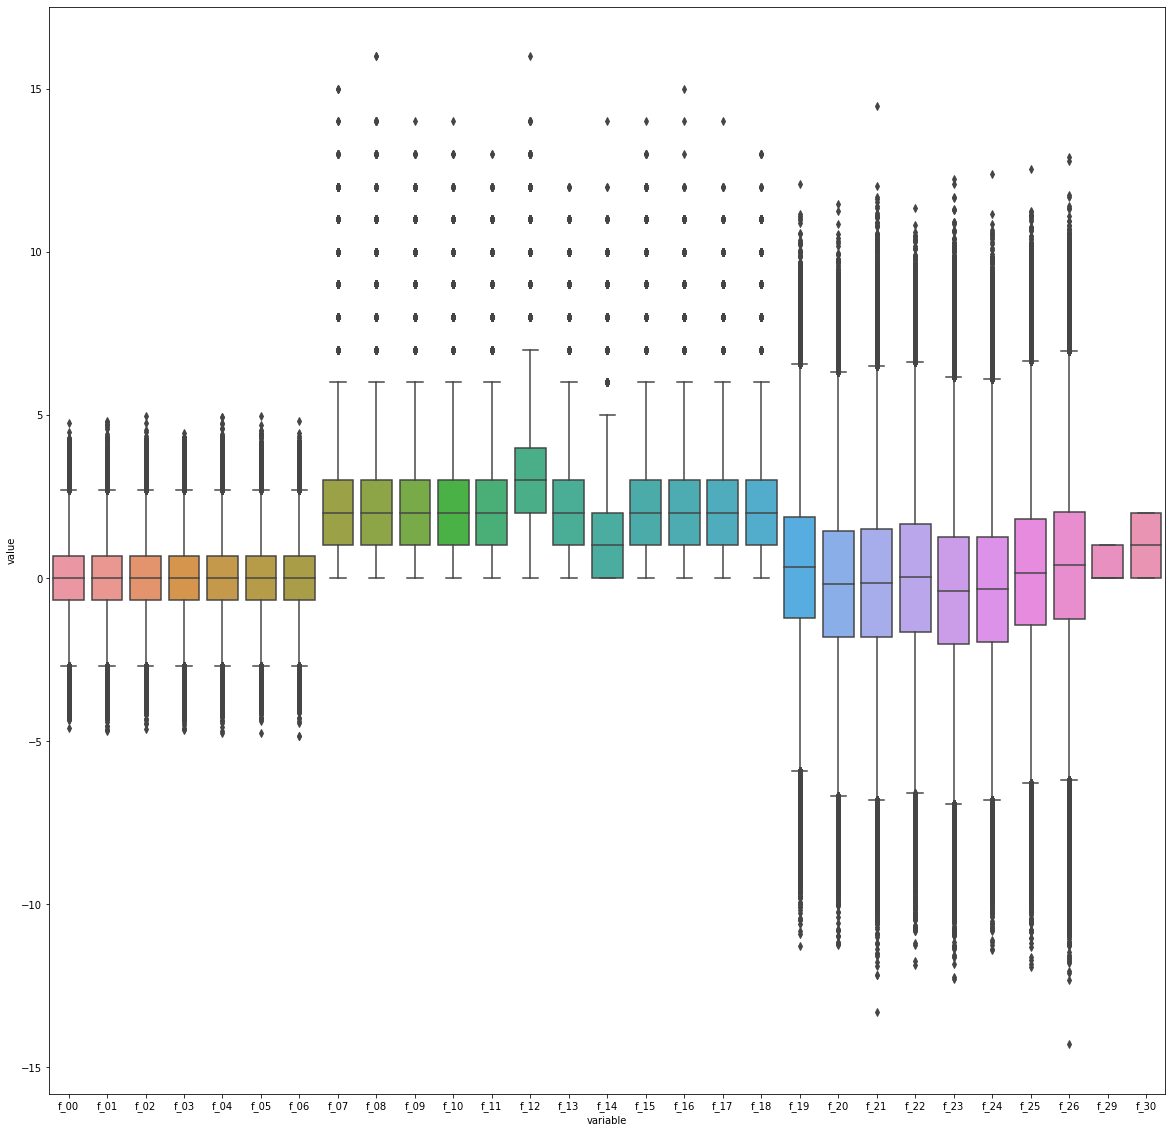

In [17]:
plt.figure(figsize=(20,20))
sns.boxplot(x='variable',y='value',data=train_df[numerical_columns].melt())

Processing feature:f_19
-1.2343031366417005 1.8818030820157954
Original size of feature:892183
Size of feature after removing outliers:885505
Percentage of data removed: 0.7485011483070177

Processing feature:f_20
-1.8073131375064653 1.442604638083989
Original size of feature:885505
Size of feature after removing outliers:879637
Percentage of data removed: 0.6626727121811847

Processing feature:f_21
-1.8174036109971827 1.500821273176682
Original size of feature:879637
Size of feature after removing outliers:872339
Percentage of data removed: 0.8296604167400871

Processing feature:f_22
-1.6430618196994553 1.6444034781197103
Original size of feature:872339
Size of feature after removing outliers:866218
Percentage of data removed: 0.7016767563986019

Processing feature:f_23
-2.0166003948723485 1.2437580407460984
Original size of feature:866218
Size of feature after removing outliers:859179
Percentage of data removed: 0.812612991186976

Processing feature:f_24
-1.9482731981885508 1.2578076

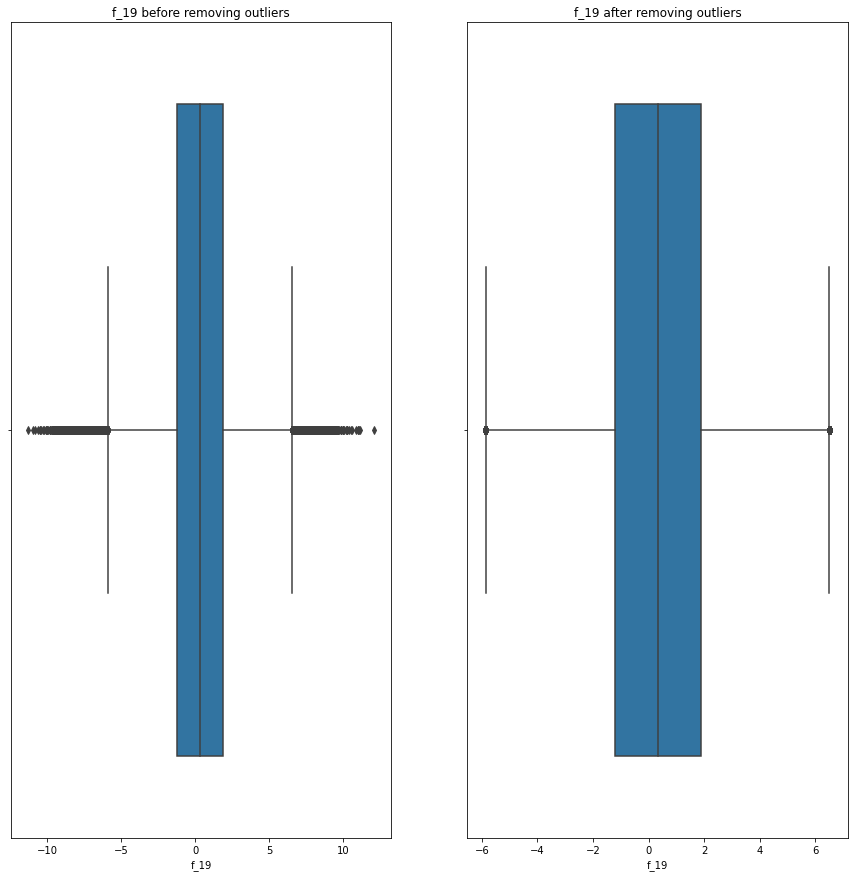

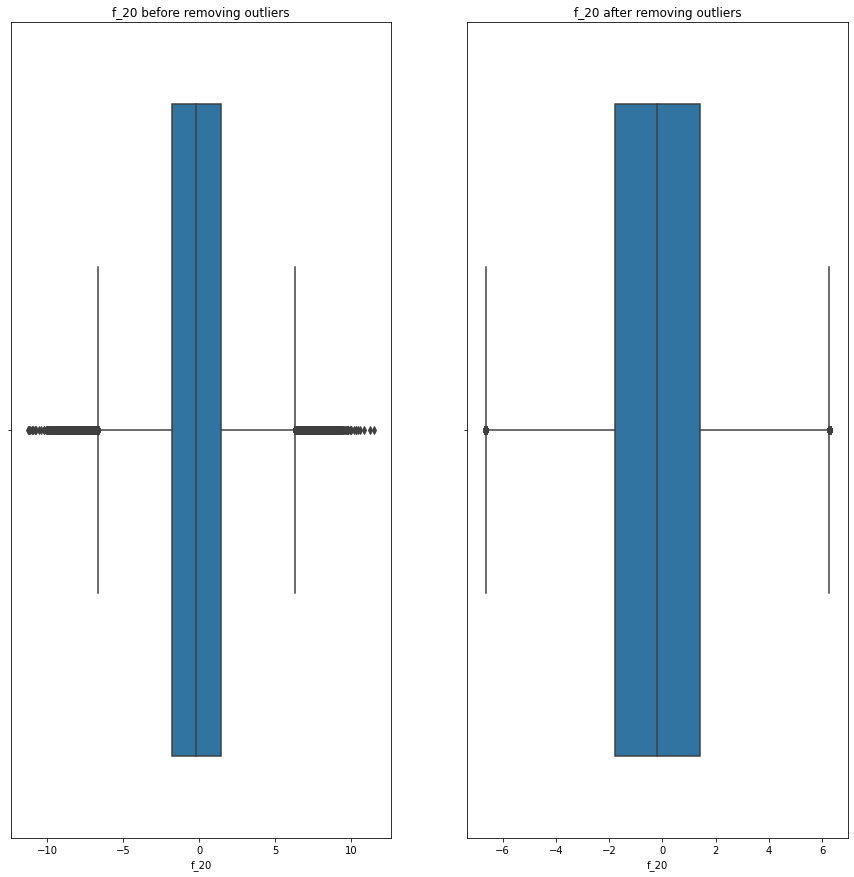

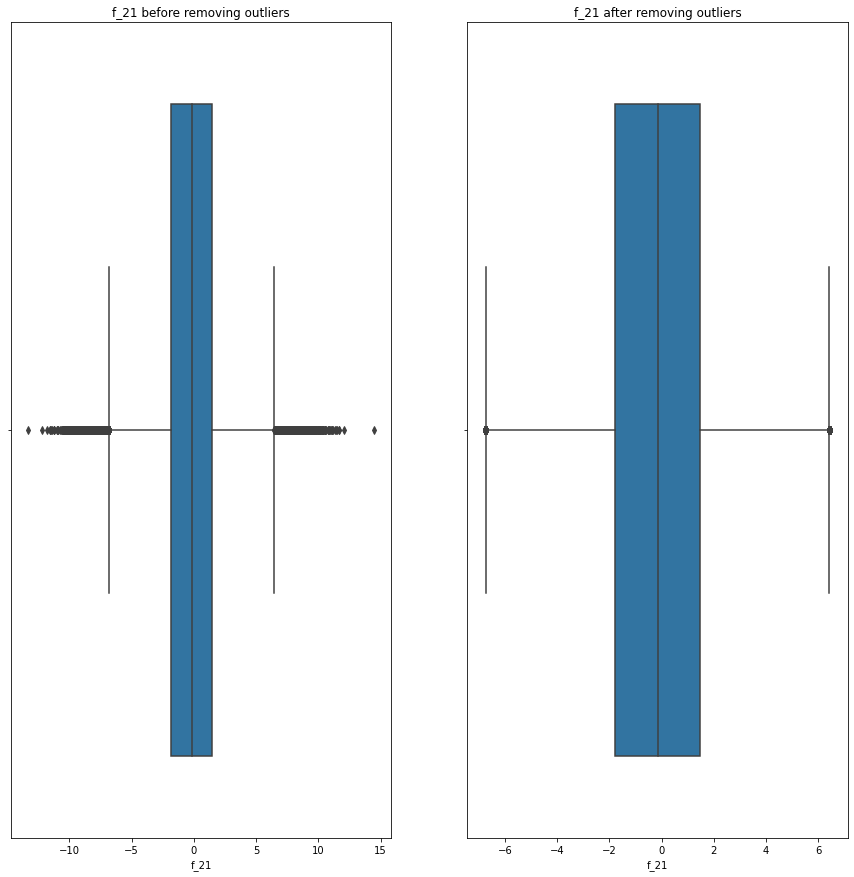

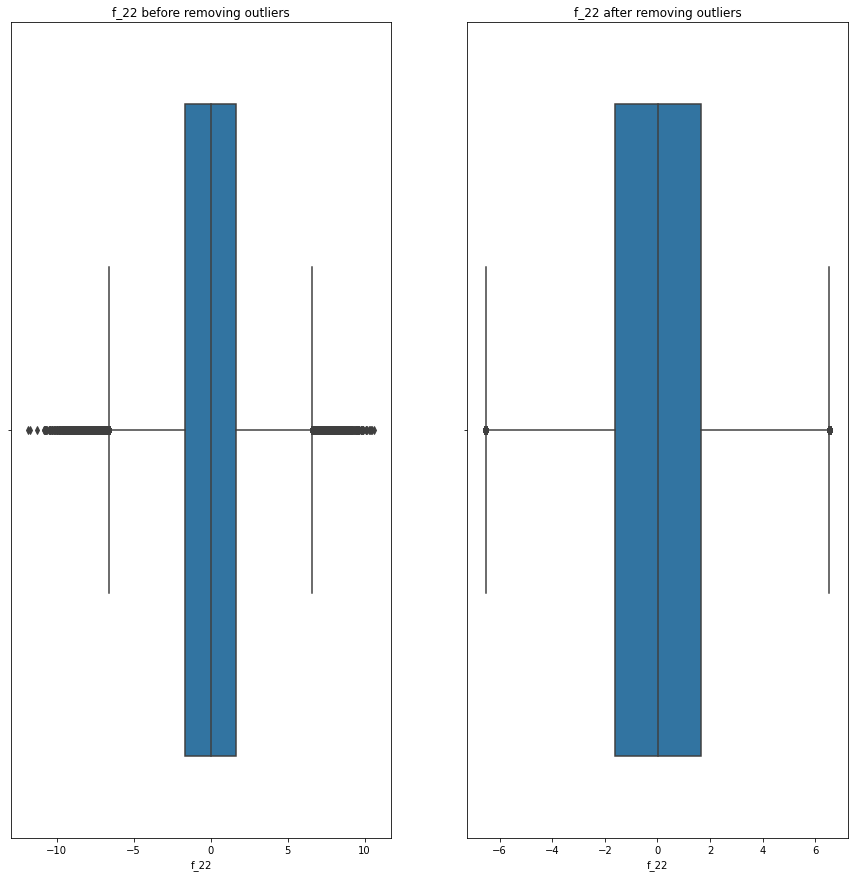

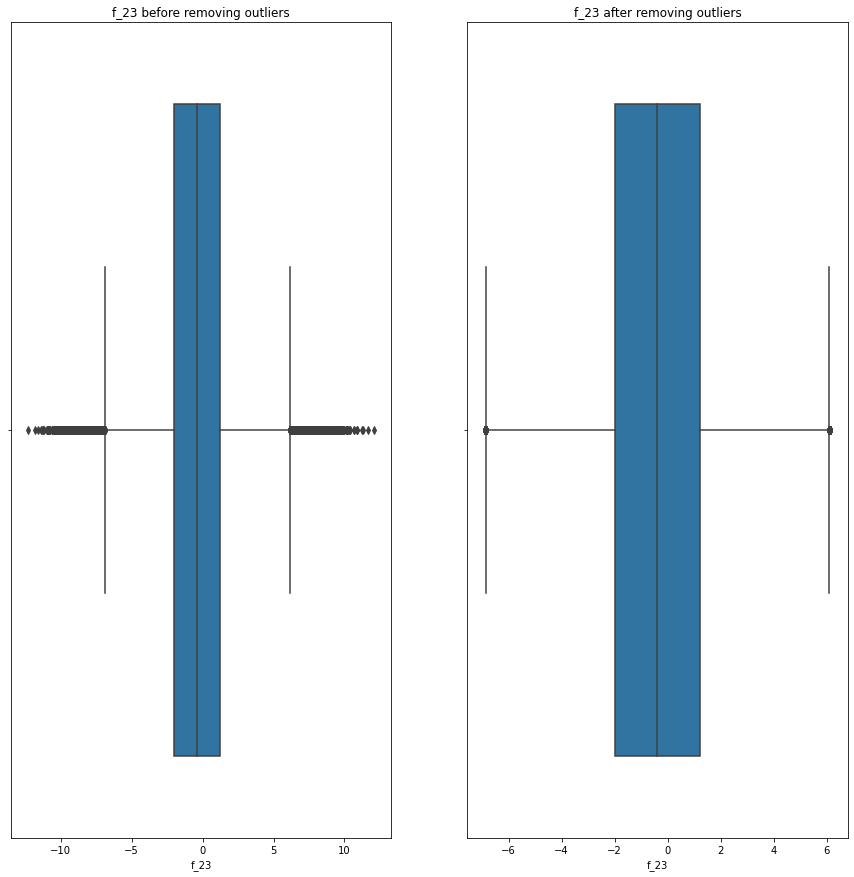

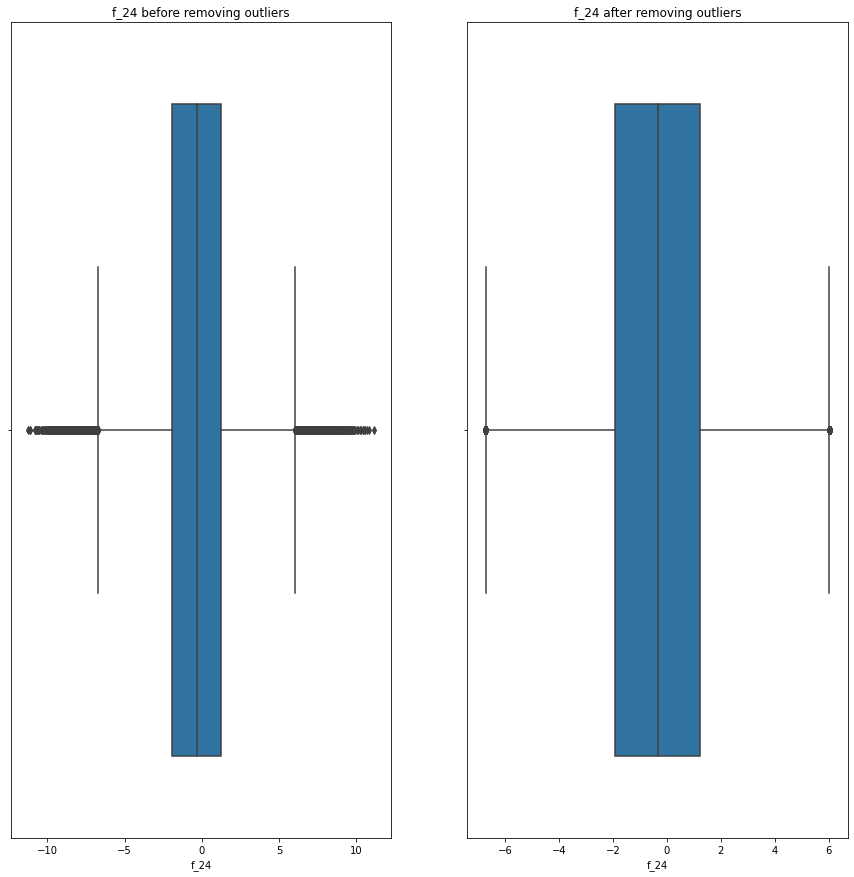

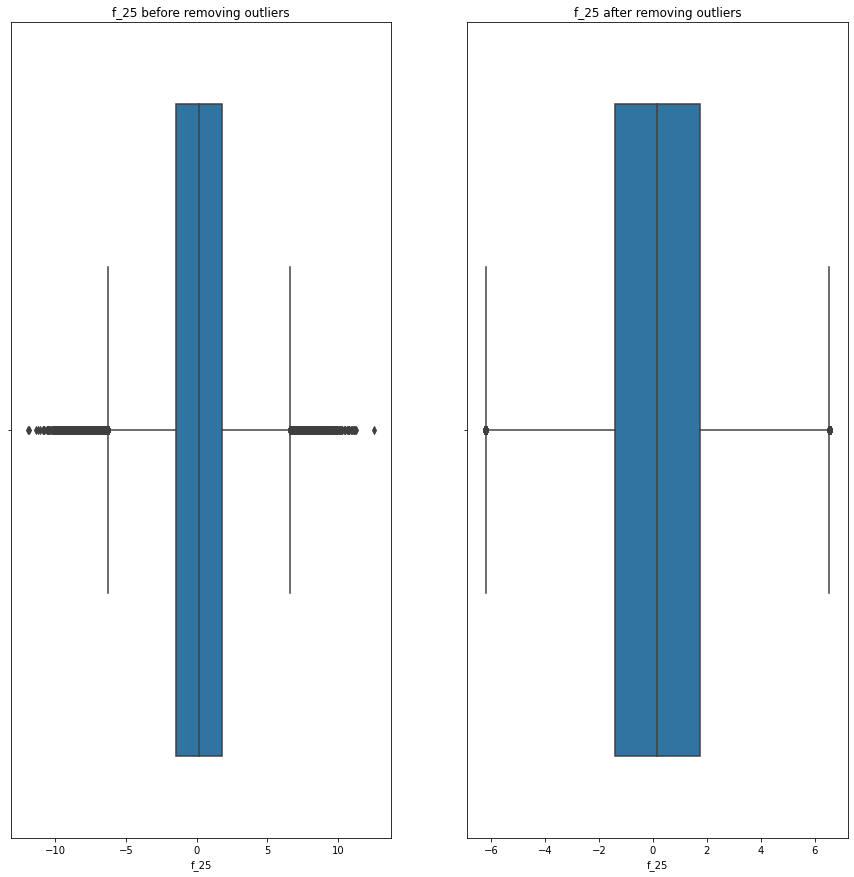

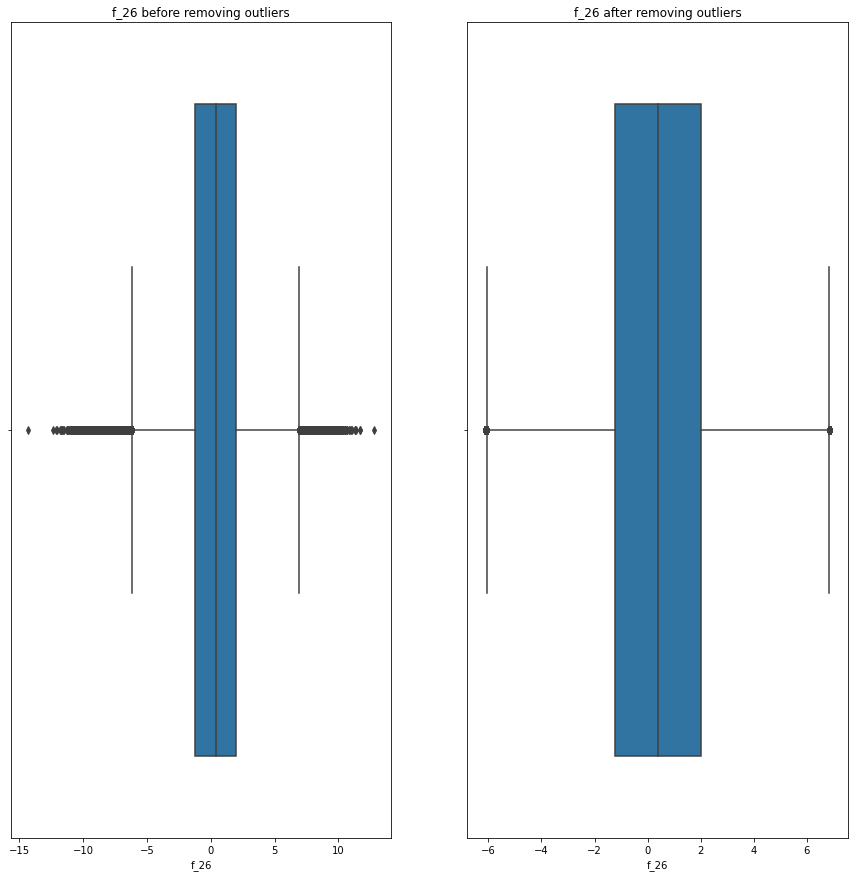

In [18]:
for col in ["f_19","f_20","f_21","f_22","f_23","f_24","f_25","f_26"]:
    train_df = remove_outliers(train_df,col)

#### Removing outliers in the test dataset as well

Processing feature:f_19
-1.2373841067531888 1.8742642560785059
Original size of feature:700000
Size of feature after removing outliers:694609
Percentage of data removed: 0.7701428571428571

Processing feature:f_20
-1.797893650875614 1.4436961933564323
Original size of feature:694609
Size of feature after removing outliers:689837
Percentage of data removed: 0.6870052072460909

Processing feature:f_21
-1.813988047918576 1.5015841255722835
Original size of feature:689837
Size of feature after removing outliers:683997
Percentage of data removed: 0.846576800026673

Processing feature:f_22
-1.6385032515105629 1.6463223873878494
Original size of feature:683997
Size of feature after removing outliers:679263
Percentage of data removed: 0.6921082987206084

Processing feature:f_23
-2.016438106768446 1.240252364020072
Original size of feature:679263
Size of feature after removing outliers:673429
Percentage of data removed: 0.8588720421986771

Processing feature:f_24
-1.9386417348132945 1.263812946

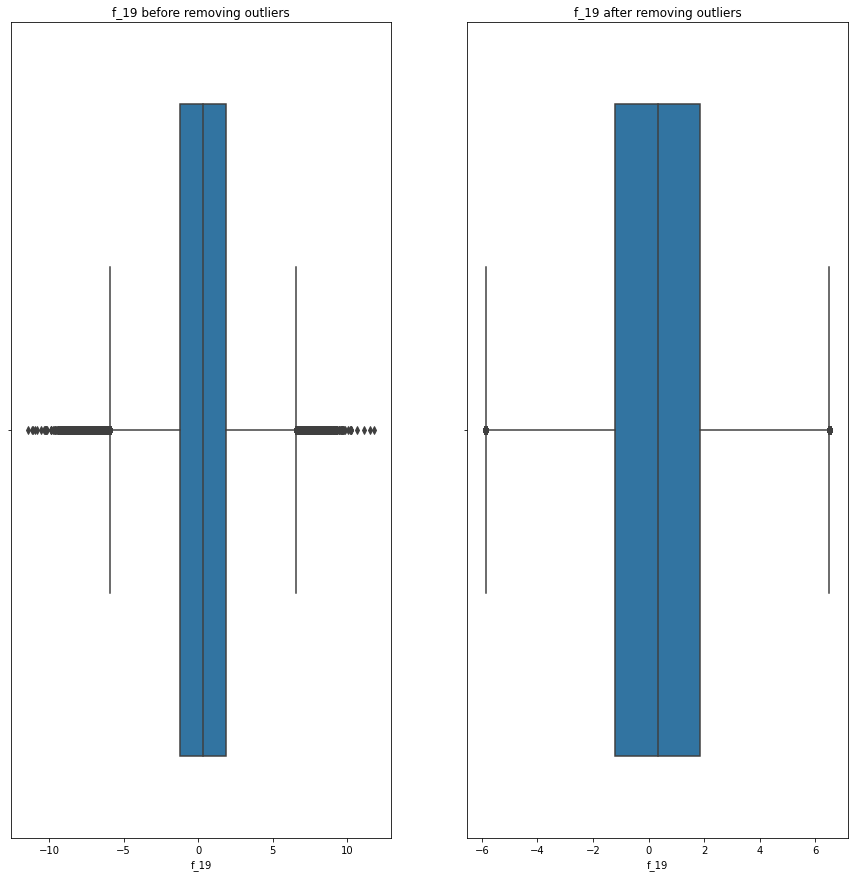

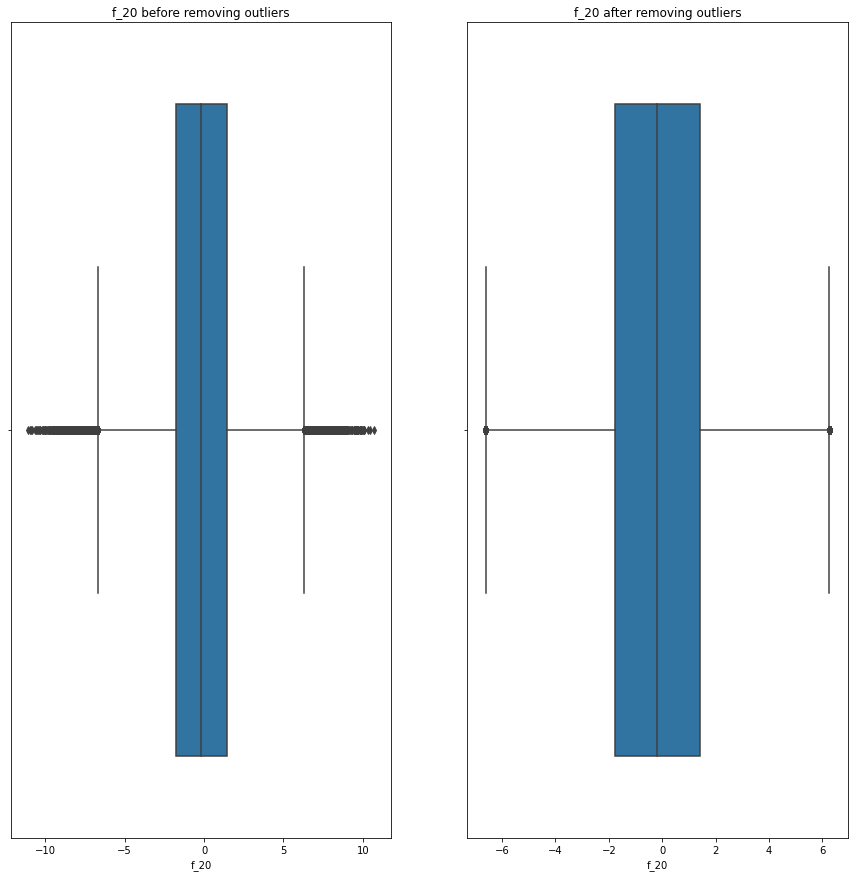

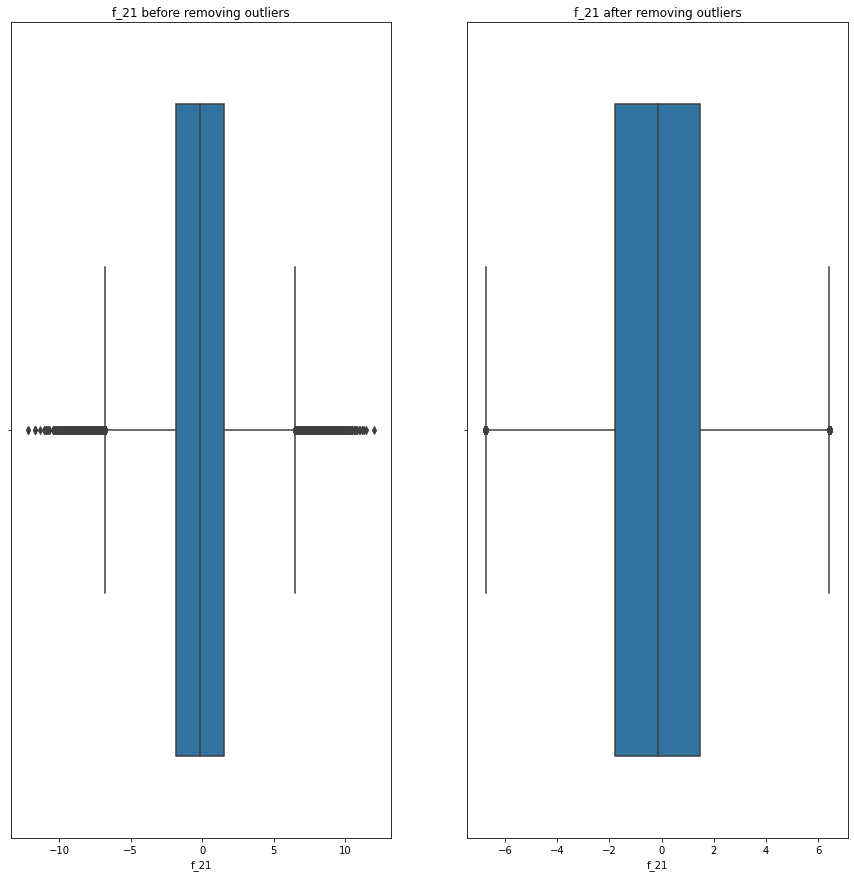

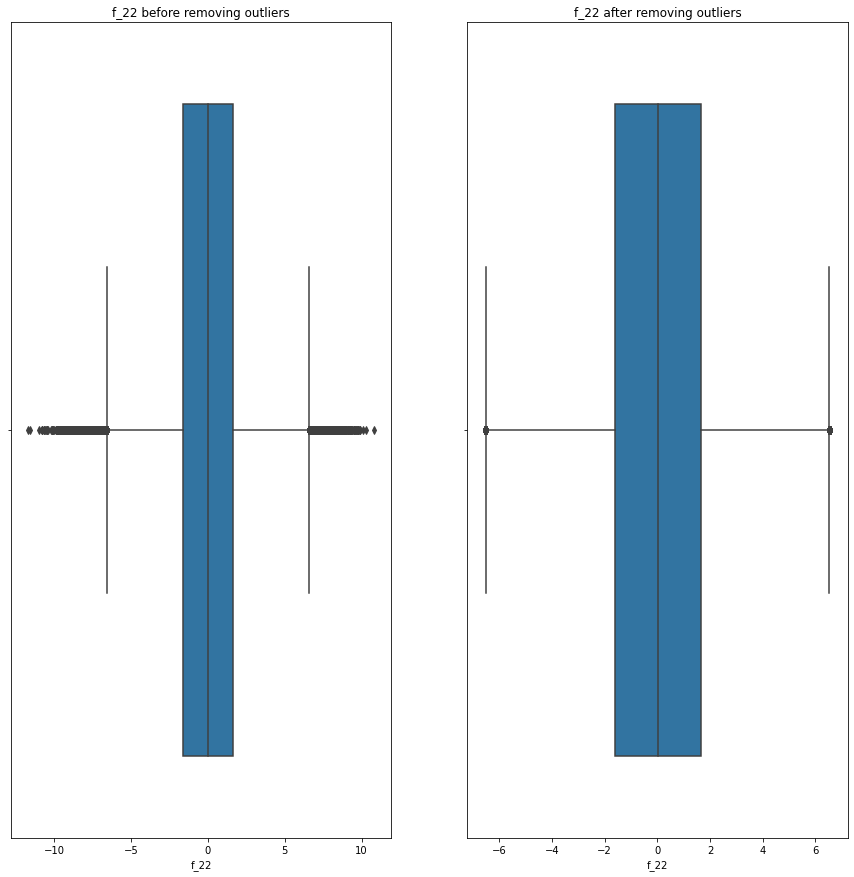

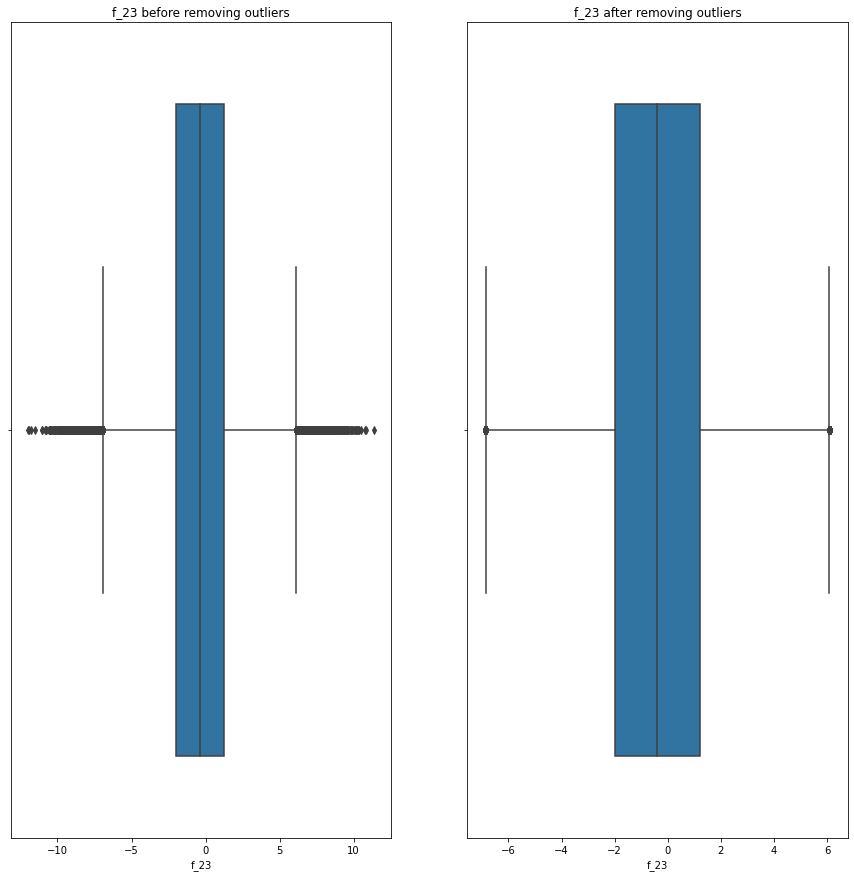

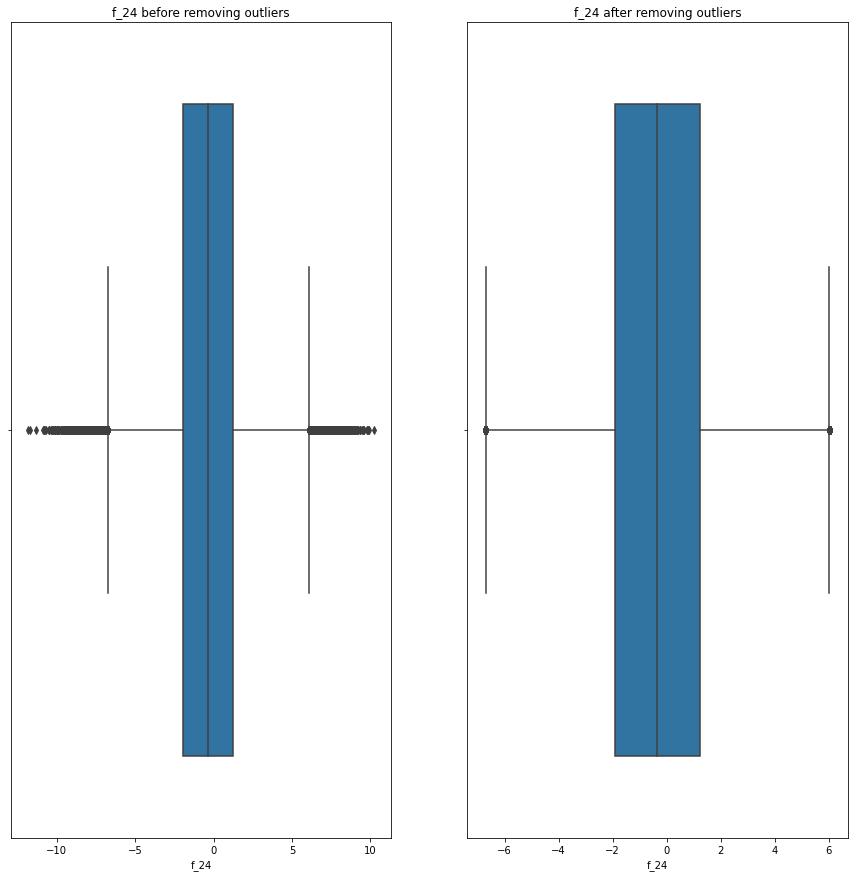

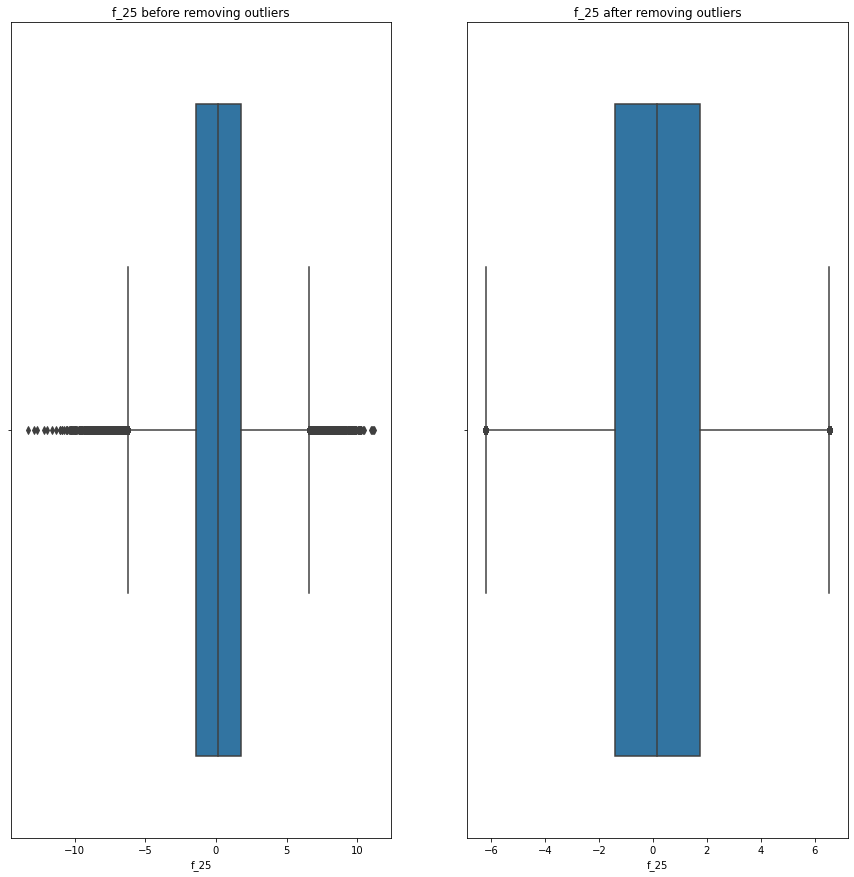

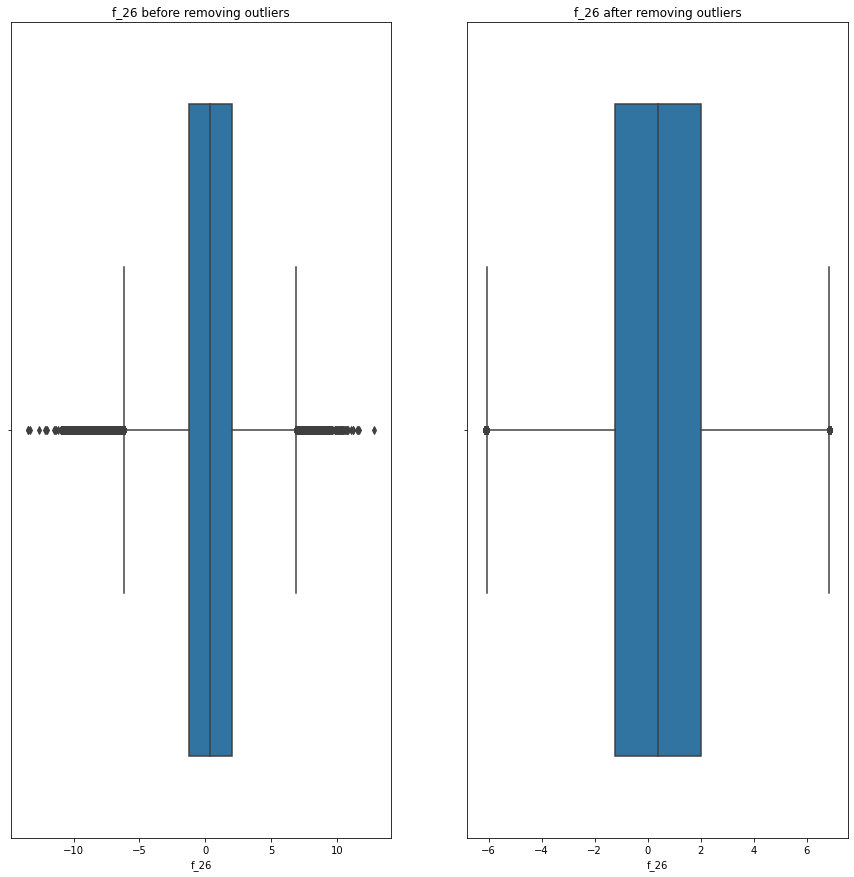

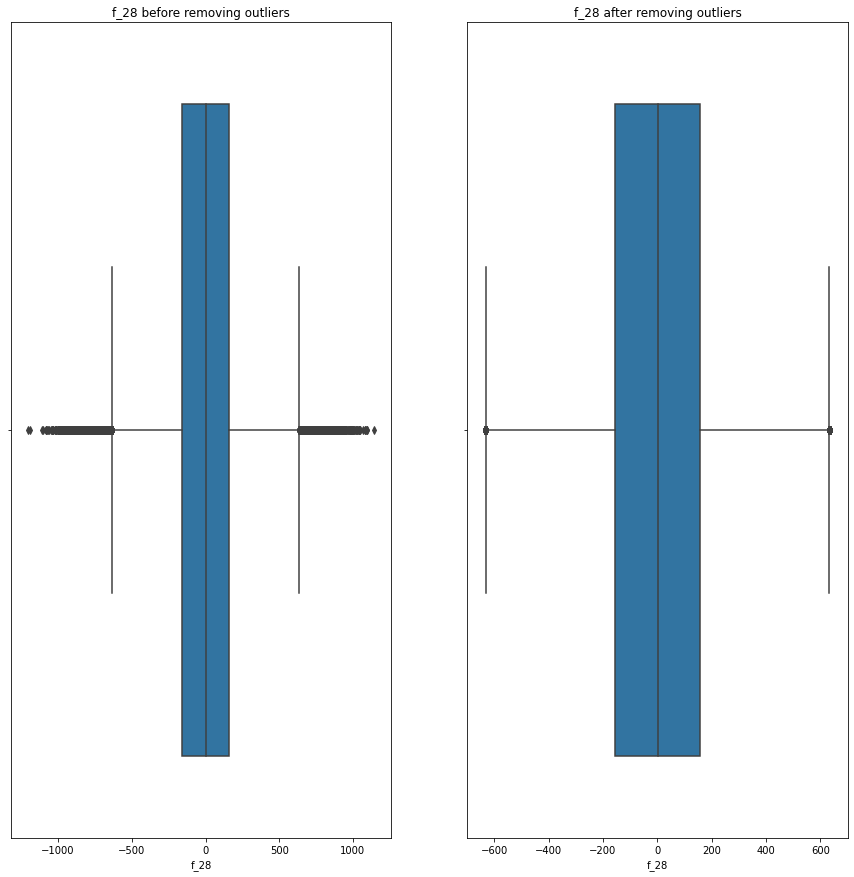

In [25]:
for col in ["f_19","f_20","f_21","f_22","f_23","f_24","f_25","f_26","f_28"]:
    test_df = remove_outliers(test_df,col)

In [ ]:
train_df[cat_column].value_counts()

In [19]:
train_df["kfold"] = -1
train_df = train_df.sample(frac=1).reset_index(drop=True)
X,y = train_df.drop('target',axis=1),train_df.target

In [20]:
X.shape,y.shape

((837555, 33), (837555,))

### Performing Stratified K-Fold validation with 10 splits

In [21]:
kfold = model_selection.StratifiedKFold(n_splits=10,shuffle=True)

In [22]:
for fold,(train_index,valid_index) in enumerate(kfold.split(X=X,y=y)):
    train_df.loc[valid_index,'kfold'] = fold
train_df.to_csv("train_folds.csv",index=False)

In [23]:
useful_cols = [col for col in train_df.columns if col not in ('id','kfold','f_27','target')]
useful_cols

['f_00',
 'f_01',
 'f_02',
 'f_03',
 'f_04',
 'f_05',
 'f_06',
 'f_07',
 'f_08',
 'f_09',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_28',
 'f_29',
 'f_30']

In [24]:
df_folds = pd.read_csv("./train_folds.csv")

#### Building the baseline model using each fold created.

In [26]:
test_predictions = []
def run_fold(fold,model):
    # Training the model with the newly created csv file
    print(f'Processing fold:{fold}')
    df_train = df_folds[df_folds.kfold!=fold].reset_index(drop=True)
    df_validation = df_folds[df_folds.kfold==fold].reset_index(drop=True)
    
    X_train,Y_train = df_train.drop(['target'],axis=1),df_train.target
    X_valid,Y_valid = df_validation.drop(['target'],axis=1),df_validation.target
    
    X_train,X_valid = X_train[useful_cols],X_valid[useful_cols]
    X_test = test_df.copy()
    X_test = X_test[useful_cols]
    
    # Building the model 
    if model=='XGBoost':
        clf = XGBClassifier()
    elif model=='LightGBM':
        clf = LGBMClassifier()
    
    clf.fit(X_train,Y_train)
    Y_pred_valid = clf.predict(X_valid)
    print(f'Accuracy on validation data: {metrics.accuracy_score(Y_valid,Y_pred_valid)}')
    Y_pred_test = clf.predict(X_test)
    test_predictions.append(Y_pred_test)

In [31]:
print('Building an XGB classifier model')
for index in range(10):
    run_fold(index,'XGBoost')

Building an XGB classifier model
Processing fold:0
Accuracy on validation data: 0.8484287692822007
Processing fold:1
Accuracy on validation data: 0.8481302832035914
Processing fold:2
Accuracy on validation data: 0.8435097187067195
Processing fold:3
Accuracy on validation data: 0.8489302258942643
Processing fold:4
Accuracy on validation data: 0.849431682506328
Processing fold:5
Accuracy on validation data: 0.8452390902035699
Processing fold:6
Accuracy on validation data: 0.8451316339323025
Processing fold:7
Accuracy on validation data: 0.8451077547609098
Processing fold:8
Accuracy on validation data: 0.8462181362306728
Processing fold:9
Accuracy on validation data: 0.8498000119395857


In [32]:
xgb_predictions = test_predictions

In [33]:
print('Building a LGBM classifier model')
for index in range(10):
    run_fold(index,'LightGBM')

Building a LGBM classifier model
Processing fold:0
Accuracy on validation data: 0.8207650795166913
Processing fold:1
Accuracy on validation data: 0.8220903577057166
Processing fold:2
Accuracy on validation data: 0.8185324036486938
Processing fold:3
Accuracy on validation data: 0.8227589665218015
Processing fold:4
Accuracy on validation data: 0.8216605377525192
Processing fold:5
Accuracy on validation data: 0.8191272162855949
Processing fold:6
Accuracy on validation data: 0.8196644976419318
Processing fold:7
Accuracy on validation data: 0.8189600620858456
Processing fold:8
Accuracy on validation data: 0.8208345770401767
Processing fold:9
Accuracy on validation data: 0.8238314130499672


In [34]:
lgbm_predictions = test_predictions

#### The XGBoost model has performed better than the LGBM model. Performing hyperparameter tuning to improve the performance of the XGBoost model

In [ ]:
final_predictions = np.mean(np.column_stack(xgb_predictions),axis=1).tolist()

In [ ]:
submissions_df = pd.read_csv("../input/tabular-playground-series-may-2022/sample_submission.csv")
submissions_df.target = final_predictions

In [ ]:
submissions_df.to_csv("submission2.csv",index=False)